In [9]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cat = fits.open('/Users/thomassiegert/python/SPI_catalogue/spi_cat.fits.gz')

In [3]:
cat.info()

Filename: /Users/thomassiegert/python/SPI_catalogue/spi_cat.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPICAT        1 BinTableHDU     30   256R x 7C   [20A, E, E, 16E, 16E, 4A, 4E]   
  2  EBOUNDS       1 BinTableHDU     22   16R x 4C   [E, E, E, E]   


In [4]:
cat['EBOUNDS'].columns

ColDefs(
    name = 'E_CEN'; format = 'E'; unit = 'keV'
    name = 'E_ERR'; format = 'E'; unit = 'keV'
    name = 'E_MIN'; format = 'E'; unit = 'keV'
    name = 'E_MAX'; format = 'E'; unit = 'keV'
)

In [5]:
ecen = cat['EBOUNDS'].data['E_CEN']
eerr = cat['EBOUNDS'].data['E_ERR']
emin = cat['EBOUNDS'].data['E_MIN']
emax = cat['EBOUNDS'].data['E_MAX']

In [6]:
cat['SPICAT'].columns

ColDefs(
    name = 'NAME'; format = '20A'
    name = 'GLON'; format = 'E'; unit = 'deg'
    name = 'GLAT'; format = 'E'; unit = 'deg'
    name = 'FLUX'; format = '16E'; unit = 'ph/cm2/s/keV'
    name = 'FLUX_ERR'; format = '16E'; unit = 'ph/cm2/s/keV'
    name = 'FITFUN'; format = '4A'
    name = 'FITPARS'; format = '4E'
)

In [7]:
name = cat['SPICAT'].data['NAME']
glon = cat['SPICAT'].data['GLON']
glat = cat['SPICAT'].data['GLAT']
flux = cat['SPICAT'].data['FLUX']
flux_err = cat['SPICAT'].data['FLUX_ERR']
fit_fun = cat['SPICAT'].data['FITFUN']
fit_pars = cat['SPICAT'].data['FITPARS']

Text(0, 0.5, 'Gal. lat. [deg]')

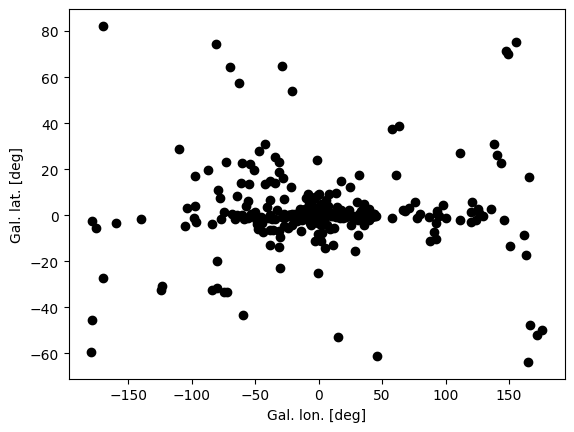

In [11]:
plt.plot(glon,glat,'ko')
plt.xlabel('Gal. lon. [deg]')
plt.ylabel('Gal. lat. [deg]')

In [13]:
print(name)

['SAX J1747.0-2853' 'IGR J17507-2856' 'Oph Cluster' 'SLX 1735-269'
 'RX J1832-330' 'AX J1749.1-2733' 'GX 1+4' 'XTE J1807-294' 'GX 3+1'
 '4U 1820-303' 'IGR J17544-2619' 'GRS 1758-258' 'V1223 Sgrgg' 'GX 5-1'
 'IGR J17348-2045' 'IGR J17461-2204' 'IGR J18173-2509' 'IGR J17597-2201'
 '4U 1745-203' 'GX 9+9' 'GS 1826-24' 'SAX J1802.7-201ee' 'SGR 1806-20'
 'PSR J1811-1926' 'HETE J1900.1-2455' 'PKS 1830-211' 'IGR J18135-1751ee'
 'GX 13+1' '2E 1739.1-1210' 'SAX J1818.6-1703' 'IGR J18027-1455'
 'NGC 7172' 'GX 17+2' 'AX J1820.5-1434' 'RX J1826.2-1450'
 'IGR J18214-1318' 'IGR J17303-0601' 'M 1812-12' 'IGR J183047-1232'
 'IGR J18256-1035' 'SNR 021.5-00.9' 'AX J183039-1002' 'IGR J18259-0706'
 'IGR J18325-0756' 'SWIFT J1753.5-0127' 'AX J1838.0-0655ff' '4U 1850-087'
 'AX J1841.0-0535' 'IGR J18450-0435' 'RX J1940.1-1025' 'IGR J18483-0311'
 '4U1822-000' 'XTE J1855-026' '4U 1916-053' 'IGR J18485-0047'
 'IGR J17472+0701' 'GS 1843+009' 'IGR J18457+0244' 'XTE J1901+014'
 'Aql X-1' 'Ser X-1' 'XTE J1858+034hh'

In [14]:
np.where(name == 'Cen A')

(array([164]),)

In [16]:
idx = 164

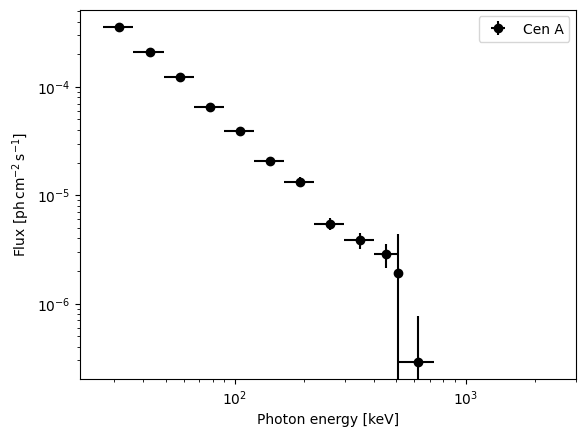

In [22]:
plt.errorbar(ecen,flux[idx],
             xerr=eerr,yerr=flux_err[idx],linestyle='',marker='o',color='black',label=name[idx])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Photon energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]')
plt.legend()